In [24]:
import numpy as np
import matplotlib.pyplot as plt
import DeltaVar as dv
import SpectralSynthesis as ss

In [25]:
H_list = np.linspace(0.0,1.0,11)
sigma_list = np.array([0.5,1.0,2.0,3.0])

print(H_list)
print(sigma_list)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1. ]
[ 0.5  1.   2.   3. ]


In [26]:
import time

C:\Users\C1764397\Workshop\PhD\Scripts\SpectralSynthesis.py:58: RuntimeWarning: divide by zero encountered in reciprocal
  rad = np.where(k>0.0,k**(-(beta*0.5)),0.0)
C:\Users\C1764397\Workshop\PhD\Scripts\SpectralSynthesis.py:58: RuntimeWarning: divide by zero encountered in power
  rad = np.where(k>0.0,k**(-(beta*0.5)),0.0)


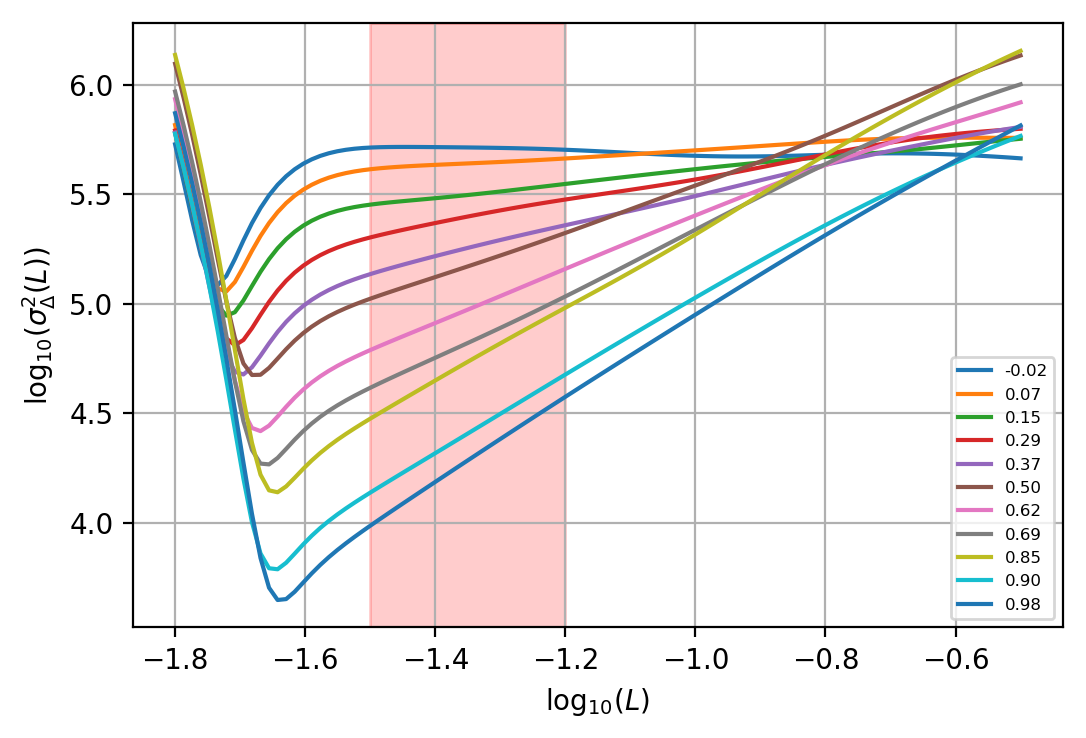

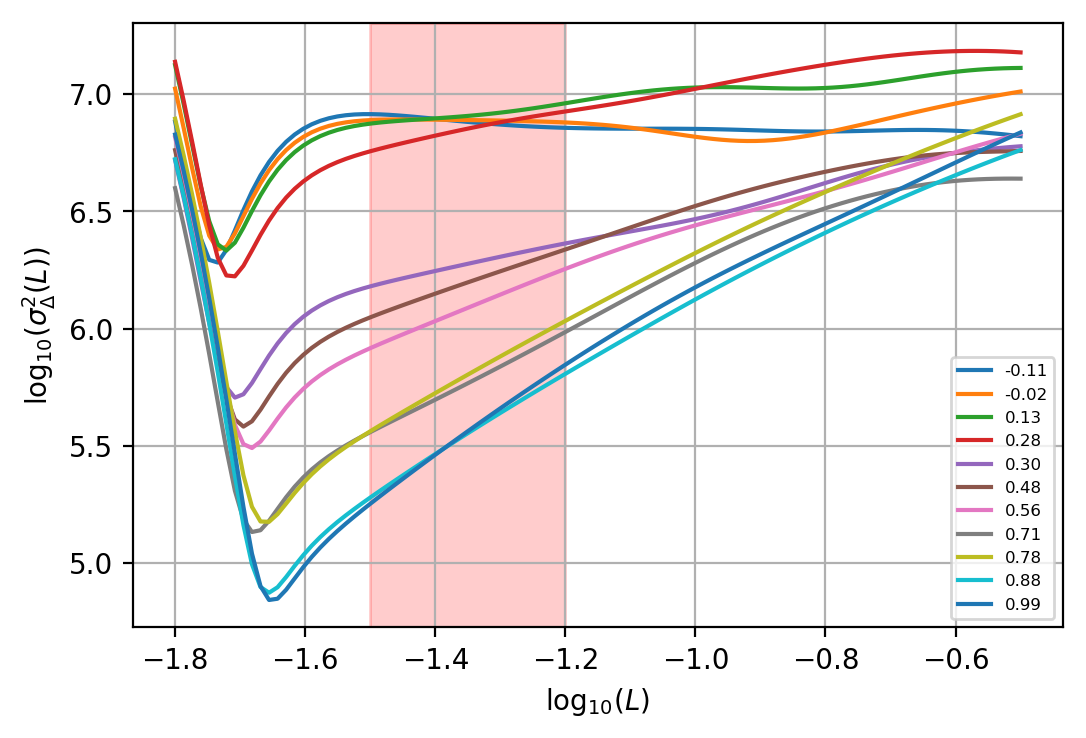

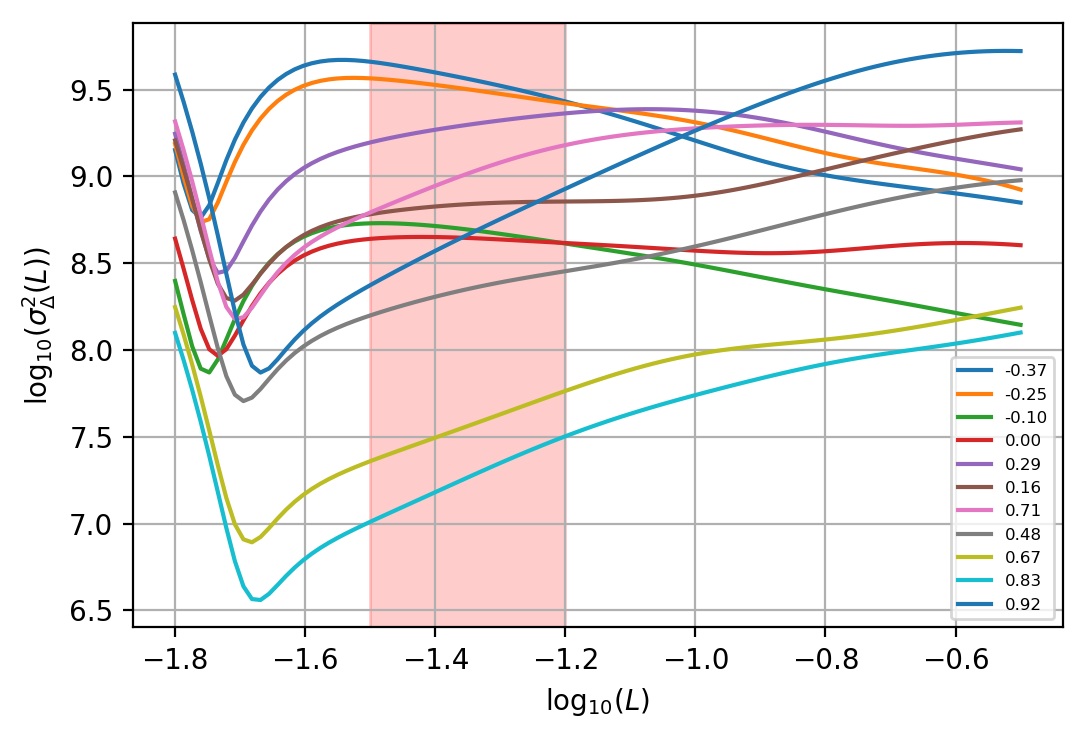

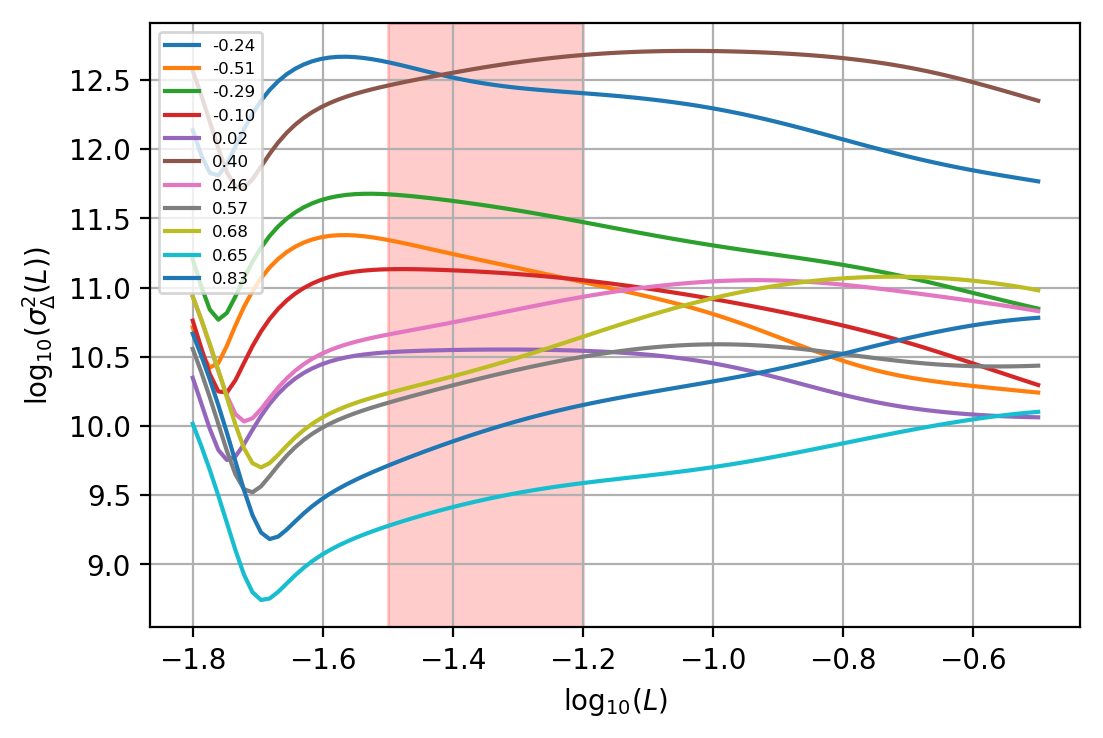

In [20]:
N_fields = 1
N_pixels = 100
E = 2

L = 10**(np.linspace(-1.8,-0.5, 100))
L_range = 10**(np.linspace(-1.5,-1.2,100))
v = 1.5

for s in sigma_list:
    f,ax = plt.subplots(dpi=200)
    for h in H_list:
        for n in range(0,N_fields):
            field = ss.fBm(N=N_pixels, E=E, H=h, sigma=s)
            sigma_d = [dv.DeltaVar(field, l, v, periodicity = True) for l in L]
            sigma_d_range = [dv.DeltaVar(field, l, v, periodicity = True) for l in L_range]
            h = dv.HurstEstimator(sigma_d_range,L_range)
            ax.plot(np.log10(L),np.log10(sigma_d),label="{:.2f}".format(h[0]))
    ax.axvspan(np.log10(L_range[0]),np.log10(L_range[-1]), color = 'red', alpha = 0.2)
    plt.xlabel(r'$\log_{10}(L)$')
    plt.ylabel(r'$\log_{10}(\sigma^2_\Delta(L))$')
    plt.grid()
    plt.legend(prop={'size': 6})
    plt.savefig("C:/Users/C1764397/Workshop/PhD/Meetings/AntMeeting_2018_10_16/Exponentiated-Periodic-Sigma-{}-fbm-DV-{}.png".format(s,int(time.time())))
    #plt.show()

In [44]:
from tqdm import tqdm

In [45]:
N_fields = 100
N_pixels = 100
E = 2

L_range = 10**(np.linspace(-1.5,-1.2,100))
v = 1.5

H_curves = []
for s in tqdm(sigma_list):
    H_curves_i = []
    for h in H_list:
        h_calculated = []
        for n in range(0,N_fields):
            field = ss.fBm(N=N_pixels, E=E, H=h, sigma=s)
            sigma_d_range = [dv.DeltaVar(field, l, v, periodicity = True) for l in L_range]
            h_calculated.append(dv.HurstEstimator(sigma_d_range,L_range)[0])
        h_avg = np.mean(h_calculated)
        h_std = np.std(h_calculated)
        H_curves_i.append([h,h_avg,h_std])
    H_curves_i = np.asarray(H_curves_i)
    H_curves.append(H_curves_i)
print(np.asarray(H_curves))

  0%|                                                                                            | 0/4 [00:00<?, ?it/s]C:\Users\C1764397\Workshop\PhD\Scripts\SpectralSynthesis.py:58: RuntimeWarning: divide by zero encountered in reciprocal
  rad = np.where(k>0.0,k**(-(beta*0.5)),0.0)
C:\Users\C1764397\Workshop\PhD\Scripts\SpectralSynthesis.py:58: RuntimeWarning: divide by zero encountered in power
  rad = np.where(k>0.0,k**(-(beta*0.5)),0.0)
100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [14:07<00:00, 211.96s/it]


[[[ 0.         -0.02388155  0.0265426 ]
  [ 0.1         0.07741194  0.02286605]
  [ 0.2         0.1873892   0.02905115]
  [ 0.3         0.2876122   0.03661378]
  [ 0.4         0.39357391  0.03266355]
  [ 0.5         0.49948266  0.03518306]
  [ 0.6         0.59298733  0.0299116 ]
  [ 0.7         0.70644159  0.0352473 ]
  [ 0.8         0.80765748  0.03555555]
  [ 0.9         0.90759674  0.03369224]
  [ 1.          1.0097627   0.0367125 ]]

 [[ 0.         -0.10785792  0.0515607 ]
  [ 0.1         0.0127202   0.06953215]
  [ 0.2         0.10448371  0.07098747]
  [ 0.3         0.23998473  0.06354282]
  [ 0.4         0.36232154  0.07132392]
  [ 0.5         0.47586767  0.0752768 ]
  [ 0.6         0.58641457  0.06385952]
  [ 0.7         0.69710351  0.06615303]
  [ 0.8         0.80954642  0.07196642]
  [ 0.9         0.90037728  0.06440454]
  [ 1.          1.01386529  0.06637968]]

 [[ 0.         -0.35112064  0.12865735]
  [ 0.1        -0.20066766  0.1323957 ]
  [ 0.2        -0.05993869  0.135494

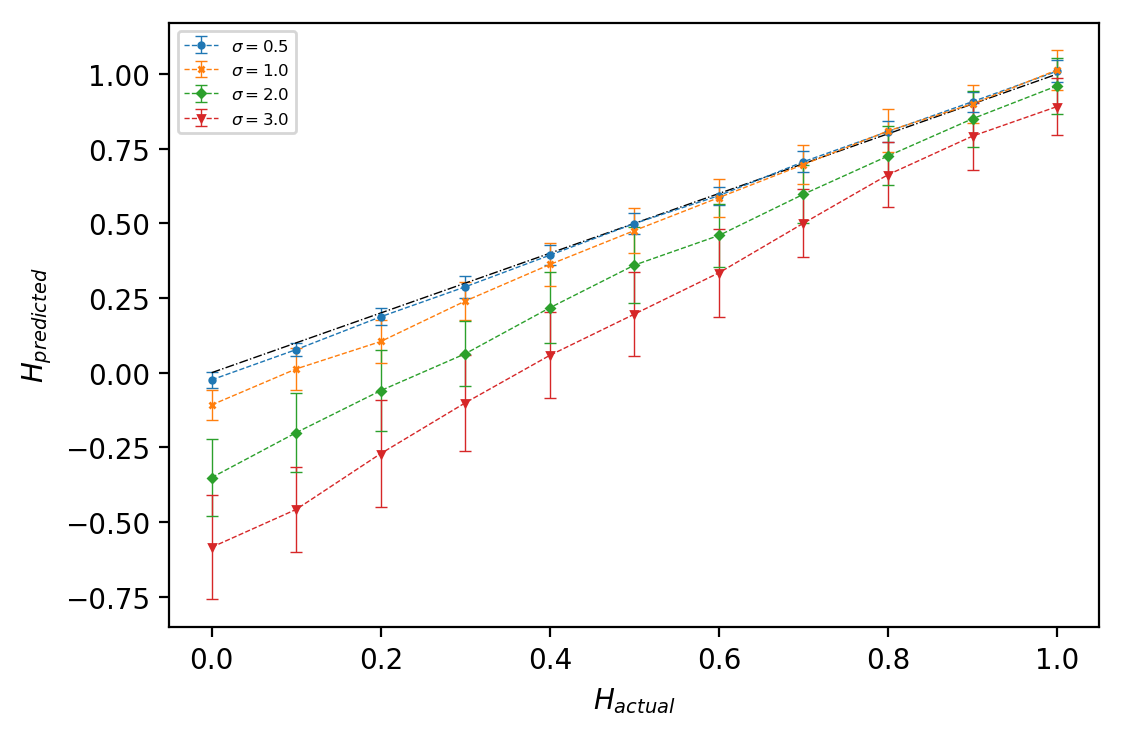

In [96]:
plt.figure(dpi=200)

markers = ['o--','x--','D--','v--']

for i in range(sigma_list.size):
    plt.errorbar(H_curves[i][:,0],H_curves[i][:,1], yerr = H_curves[i][:,2], ms = 2, 
                 fmt=markers[i], label = r'$\sigma = {}$'.format(sigma_list[i]),
                capsize = 2, linewidth = 0.5, capthick = 0.5)
plt.plot([0,1],[0,1], 'k-.', linewidth = 0.5)
plt.xlabel(r'$H_{actual}$')
plt.ylabel(r'$H_{predicted}$')
plt.legend(prop={'size': 6})
plt.savefig("C:/Users/C1764397/Workshop/PhD/Meetings/AntMeeting_2018_10_16/Exponentiated-Periodic-Sigma-Performance-fbm-DV-{}.png".format(int(time.time())))
plt.show()